In [ ]:
import csv
import pandas as pd
import numpy as np

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')


Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


#***Reading the csv file***#

In [ ]:
file_path="/content/gdrive/MyDrive/YT_Videos_Comments.csv"

In [ ]:
with open(file_path, 'r') as f:
    reader = csv.reader(f)
    # Create list of rows
    rows = [row for row in reader]

# Create Pandas DataFrame
df = pd.DataFrame(rows[1:], columns=rows[0])

# Display first 5 rows of the DataFrame
df.head()

,User,Video Title,Video Description,Video ID,Comment (Displayed),Comment (Actual),Comment Author,Comment Author Channel ID,Comment Time
0,Cleo Abram,"Robots made of spiders (yes, really)",I'M SORRY OK. But this is fascinating. \n\nSci...,YXd4z3gWyVE,zombie spider!! bomb the damn lab before it&#3...,zombie spider!! bomb the damn lab before it's ...,Bagus Hutomo,UC-F6GFyxAqGhN3_MEJLksxg,2023-03-11T07:39:33Z
1,Cleo Abram,"Robots made of spiders (yes, really)",I'M SORRY OK. But this is fascinating. \n\nSci...,YXd4z3gWyVE,"This is way less cool than it seems, spiders a...","This is way less cool than it seems, spiders a...",CMZ neu,UCZKnVEtNze-fFxCvsRnaIuA,2023-03-11T05:26:10Z
2,Cleo Abram,"Robots made of spiders (yes, really)",I'M SORRY OK. But this is fascinating. \n\nSci...,YXd4z3gWyVE,Spiders see this and this is why they made the...,Spiders see this and this is why they made the...,Kiana Marrie,UCutp6oeKAxsO6fXp1vyzvIQ,2023-03-11T04:02:27Z
3,Cleo Abram,"Robots made of spiders (yes, really)",I'M SORRY OK. But this is fascinating. \n\nSci...,YXd4z3gWyVE,you looks pretty 😍,you looks pretty 😍,Noob,UC9J99riIPd6ja-XDFSwrY-Q,2023-03-11T02:50:50Z
4,Cleo Abram,"Robots made of spiders (yes, really)",I'M SORRY OK. But this is fascinating. \n\nSci...,YXd4z3gWyVE,I can hear the hairs standing up on my wife’s ...,I can hear the hairs standing up on my wife’s ...,chancellor9000,UC8WEPXkCSh87h6kBcFT-o1g,2023-03-11T02:46:02Z


#***Pre-processing***#

In [ ]:
df.isnull().sum()

User                           0
Video Title                  149
Video Description            162
Video ID                     162
Comment (Displayed)          177
Comment (Actual)             426
Comment Author               428
Comment Author Channel ID    428
Comment Time                 428
dtype: int64

In [ ]:
# To drop the null values

df.dropna(inplace=True);
df=df.reset_index(drop=True);

In [ ]:
df

,User,Video Title,Video Description,Video ID,Comment (Displayed),Comment (Actual),Comment Author,Comment Author Channel ID,Comment Time
0,Cleo Abram,"Robots made of spiders (yes, really)",I'M SORRY OK. But this is fascinating. \n\nSci...,YXd4z3gWyVE,zombie spider!! bomb the damn lab before it&#3...,zombie spider!! bomb the damn lab before it's ...,Bagus Hutomo,UC-F6GFyxAqGhN3_MEJLksxg,2023-03-11T07:39:33Z
1,Cleo Abram,"Robots made of spiders (yes, really)",I'M SORRY OK. But this is fascinating. \n\nSci...,YXd4z3gWyVE,"This is way less cool than it seems, spiders a...","This is way less cool than it seems, spiders a...",CMZ neu,UCZKnVEtNze-fFxCvsRnaIuA,2023-03-11T05:26:10Z
2,Cleo Abram,"Robots made of spiders (yes, really)",I'M SORRY OK. But this is fascinating. \n\nSci...,YXd4z3gWyVE,Spiders see this and this is why they made the...,Spiders see this and this is why they made the...,Kiana Marrie,UCutp6oeKAxsO6fXp1vyzvIQ,2023-03-11T04:02:27Z
3,Cleo Abram,"Robots made of spiders (yes, really)",I'M SORRY OK. But this is fascinating. \n\nSci...,YXd4z3gWyVE,you looks pretty 😍,you looks pretty 😍,Noob,UC9J99riIPd6ja-XDFSwrY-Q,2023-03-11T02:50:50Z
4,Cleo Abram,"Robots made of spiders (yes, really)",I'M SORRY OK. But this is fascinating. \n\nSci...,YXd4z3gWyVE,I can hear the hairs standing up on my wife’s ...,I can hear the hairs standing up on my wife’s ...,chancellor9000,UC8WEPXkCSh87h6kBcFT-o1g,2023-03-11T02:46:02Z
...,...,...,...,...,...,...,...,...,...
379095,Physics Girl,5 AMAZING stars we’ve discovered in space!,This episode is brought to you by Squarespace:...,xyXpQxz7BOs,"hey girl,make more vdos and make it lengthy .....","hey girl,make more vdos and make it lengthy .....",Omkar Bhambure,UCgY0dubqhFHVD6wWq37UCtg,2016-01-12T21:32:52Z
379096,Physics Girl,5 AMAZING stars we’ve discovered in space!,This episode is brought to you by Squarespace:...,xyXpQxz7BOs,Third,Third,Izzo Mapping,UCF0vKXNgNwO2iutasiiLoNQ,2016-01-12T21:30:37Z
379097,Physics Girl,5 AMAZING stars we’ve discovered in space!,This episode is brought to you by Squarespace:...,xyXpQxz7BOs,third,third,Indecisive,UChNeyv6tBcgrjfXJiy3xRFg,2016-01-12T21:30:34Z
379098,Physics Girl,5 AMAZING stars we’ve discovered in space!,This episode is brought to you by Squarespace:...,xyXpQxz7BOs,Second,Second,Nathan,UCkMeQzamGWna00H_sMQddvQ,2016-01-12T21:30:02Z


#***Feature Extraction***#

In [ ]:
!pip install emoji
import re
import string
import emoji


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
def clean_text(text):
    # Convert input to string if necessary
    text = str(text)

    # Remove URLs
    text = re.sub(r'http\S+', '', text)

    # Convert emojis to text representations
    text = emoji.demojize(text)

    # Remove numbers and punctuation
    text = re.sub(r'[0-9]+', '', text)
    text = text.translate(str.maketrans('', '', string.punctuation))

    # Convert to lowercase
    text = text.lower()

    # Remove extra whitespace
    text = re.sub('\s+', ' ', text).strip()

    return text


In [ ]:
df_shorted=df[:10000];
df_shorted;
comments=df_shorted["Comment (Displayed)"];

#To reset the indices
comments=comments.reset_index(drop=True);

In [ ]:
comments

0       zombie spider!! bomb the damn lab before it&#3...
1       This is way less cool than it seems, spiders a...
2       Spiders see this and this is why they made the...
3                                      you looks pretty 😍
4       I can hear the hairs standing up on my wife’s ...
                              ...                        
9995    99.999% chance intelligent life exists elsewhe...
9996    The great filter is a cataclysm. We&#39;ve jus...
9997             The filter says &quot;Stupid&quot; on it
9998    You pass the great filter by advanced spiritua...
9999    What gets me is why do we think that what is s...
Name: Comment (Displayed), Length: 10000, dtype: object

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

cleaned_text=[clean_text(text) for text in comments]
vectorizer = TfidfVectorizer(stop_words='english')
tfidf_matrix = vectorizer.fit_transform(cleaned_text)

In [ ]:
print(tfidf_matrix)

  (0, 8967)	0.36245349264801774
  (0, 8892)	0.4137986916027529
  (0, 3930)	0.35249313191910725
  (0, 1662)	0.4244274009700923
  (0, 14926)	0.430665888615294
  (0, 17807)	0.45556006643903046
  (1, 15963)	0.09852372125869469
  (1, 7559)	0.19752454402281125
  (1, 2915)	0.2233008971133604
  (1, 9268)	0.12743307437160406
  (1, 15266)	0.12844020957340968
  (1, 9172)	0.20703782900996937
  (1, 13107)	0.1317502870227305
  (1, 9518)	0.15186833973499841
  (1, 17282)	0.1776446928255475
  (1, 6898)	0.18126147591942024
  (1, 3992)	0.3048674641963767
  (1, 135)	0.1776446928255475
  (1, 9191)	0.07257547987041157
  (1, 1178)	0.20703782900996937
  (1, 13774)	0.20180229047842124
  (1, 8723)	0.06949486779729554
  (1, 15971)	0.11068219976400578
  (1, 6900)	0.20703782900996937
  (1, 6270)	0.16499840781602917
  :	:
  (9996, 5877)	0.2512526106317328
  (9996, 6959)	0.22352360471843988
  (9996, 8723)	0.14366677127325217
  (9997, 12859)	0.726137666062931
  (9997, 13912)	0.5145984117513135
  (9997, 6059)	0.455974

In [ ]:
tfidf_matrix.shape

(10000, 17828)

In [ ]:
df_shorted.columns

Index(['User', 'Video Title', 'Video Description', 'Video ID',
       'Comment (Displayed)', 'Comment (Actual)', 'Comment Author',
       'Comment Author Channel ID', 'Comment Time'],
      dtype='object')

#***Visulaization***#

<ipython-input-17-a5c174e939d8>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df["length"],kde=True,bins=30)


<Axes: xlabel='length', ylabel='Density'>

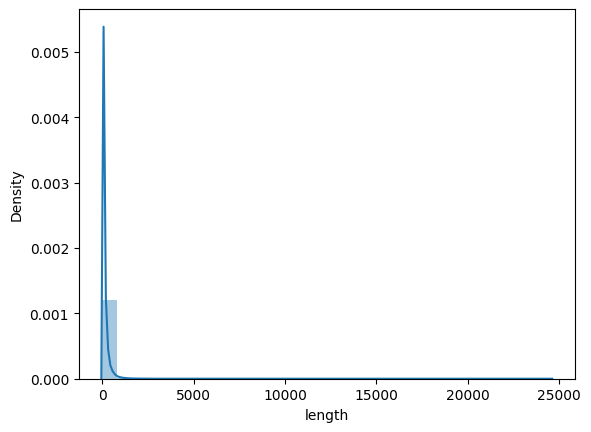

In [ ]:
# Plot of length of the displayed comment
import seaborn as sns
df['length'] = df['Comment (Displayed)'].apply(lambda x: len(x))
sns.distplot(df["length"],kde=True,bins=30)

In [ ]:
# The longest comment
print("The longest comment is:\n",df.loc[df['length'].idxmax(), 'Comment (Displayed)']);
print("The length of the longest message:",df['length'].max())

The longest comment is:
 ♥️LoveUAllAngelBeautifulSpeaksUpAlwaysAdmiresUrBeautyUtubeSHEPHERDSCHAPELStudyUrsUpFrontAliveGoodBibleReadGospelGodSpellsAsUSpeakAngelStandsInTheMistOfUsEspoAllDIMENSIONS<a href="https://www.youtube.com/watch?v=rhMSQ835hQg&amp;t=24m36s">24:36</a>+LUKE24:31+VanishedDidItBurnAsUOpenScripturesWORD2Wise1ECC9ObeyMyVOICE<a href="https://www.youtube.com/watch?v=rhMSQ835hQg&amp;t=7m23s">7:23</a>JER3:8GodADivorceeWordBecameFLESH<a href="https://www.youtube.com/watch?v=rhMSQ835hQg&amp;t=1m14s">1:14</a>JOHN20:22HolySpiritINHERITANCE<a href="https://www.youtube.com/watch?v=rhMSQ835hQg&amp;t=44m28s">44:28</a>EZE18HRU105mgZincMutationSurvivalAnimalsHEAVEN11ISA<a href="https://www.youtube.com/watch?v=rhMSQ835hQg&amp;t=8m20s">8:20</a>UrMinds2PowerFullLifesLovesMemoriesMiraclesLearnsArtsSciencesMusiciansVoicesSingsFeelsItsREVERENCES1:7PROV<a href="https://www.youtube.com/watch?v=rhMSQ835hQg&amp;t=31m12s">31:12</a>DoesGoodNotEvilTRUTH<a href="https://www.youtube.com/watch?v=rhMS

In [ ]:
#To detect url
url_pattern = r'http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+]|[!*\(\),]|(?:%[0-9a-fA-F][0-9a-fA-F]))+';

# Using str.contains() to create a boolean mask indicating which comments contain URLs
has_url = df['Comment (Displayed)'].str.contains(url_pattern)

# Filter the data frame to keep only comments that contain URLs
comments_with_url = df[has_url]

# Print the comments with URLs
print(comments_with_url['Comment (Displayed)'])

211       These should be interesting….<br><a href="http...
292       I just learnt &#39;paternalistic&#39; at <a hr...
340       <a href="https://www.youtube.com/watch?v=USmu0...
387       <a href="https://www.youtube.com/watch?v=USmu0...
539       <a href="https://www.youtube.com/watch?v=USmu0...
                                ...                        
378983    no such things as black holes, neutron stars, ...
379000    where did you get the picture for <a href="htt...
379035    <a href="http://www.youtube.com/watch?v=xyXpQx...
379055    <a href="http://www.youtube.com/watch?v=xyXpQx...
379071    <a href="http://www.youtube.com/watch?v=xyXpQx...
Name: Comment (Displayed), Length: 17123, dtype: object


***Number of comments per author***

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


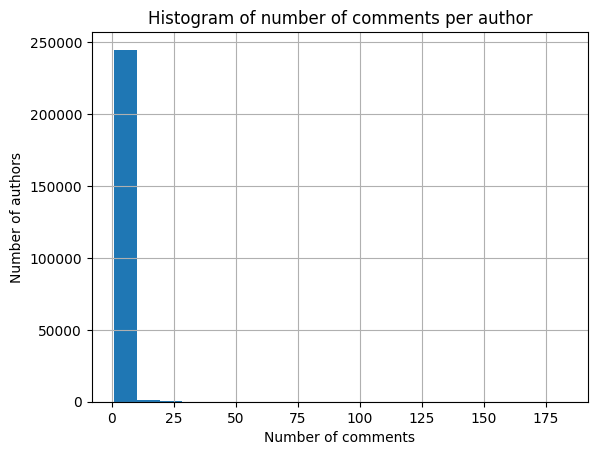

Cluster 0:
['Christopher Vinovich' 'Askia mumine' 'dArk lord' ... 'Arjun Sinha'
 'shaheed goni' 'Sha Kur']
Cluster 1:
['Ciri' 'Daniel Harper' 'Szilárd Oberritter' ... 'Kevin Dahl-Skog' 'Maeve'
 'Jesus Christ']
Cluster 2:
['Bagus Hutomo' 'CMZ neu' 'Kiana Marrie ' ... 'Trion' 'The Slingshot King'
 '314Show']


In [ ]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

comments2=df["Comment (Displayed)"];
cleaned_text2=[clean_text(text) for text in comments2]
vectorizer2 = TfidfVectorizer(stop_words='english')
tfidf_matrix2 = vectorizer2.fit_transform(cleaned_text2)

df2 = df;
km = KMeans(n_clusters=3);
km.fit(tfidf_matrix2);

# Assign the cluster labels to the comments

df2['cluster'] = km.labels_

# Plot a histogram of the number of comments per author

df2['Comment Author'].value_counts().hist(bins=20)
plt.title('Histogram of number of comments per author')
plt.xlabel('Number of comments')
plt.ylabel('Number of authors')
plt.show()

# Print the authors in each cluster
for i in range(3):
    print(f'Cluster {i}:')
    print(df2[df2['cluster'] == i]['Comment Author'].unique())

***Heatmap***

In [ ]:
import seaborn as sns
tfidf_df = pd.DataFrame(tfidf_matrix.toarray(), columns=vectorizer.vocabulary_)
f
sns.heatmap(tfidf_df)

KeyboardInterrupt: ignored

#***Kmeans***#





In [ ]:
import warnings

In [ ]:
warnings.filterwarnings("ignore")

In [ ]:
from sklearn.cluster import KMeans

In [ ]:
from sklearn.metrics import silhouette_score

silhouette_scores = []
for n_clusters in range(2, 11):
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    cluster_labels = kmeans.fit_predict(tfidf_matrix)
    silhouette_scores.append(silhouette_score(tfidf_matrix, cluster_labels))

# find the optimal number of clusters that maximizes silhouette score
optimal_num_clusters = silhouette_scores.index(max(silhouette_scores)) + 2

print("Optimal number of clusters:", optimal_num_clusters)


In [ ]:
from sklearn.cluster import KMeans

# Fit K-means clustering on the TF-IDF matrix
kmeans = KMeans(n_clusters=optimal_num_clusters, random_state=42)
kmeans.fit(tfidf_matrix)

# Get the cluster assignments for each comment
cluster_labels = kmeans.labels_


In [ ]:
np.unique(cluster_labels)

In [ ]:
list(cluster_labels).count(0)

In [ ]:
# Calculate average distance from centroid for each cluster
avg_distances = []
for i in range(kmeans.n_clusters):
    mask = (cluster_labels == i)
    centroid = kmeans.cluster_centers_[i]
    distances = np.linalg.norm(tfidf_matrix[mask] - centroid, axis=1)
    avg_distances.append(np.mean(distances))

# Identify the cluster with the highest average distance from its centroid
spam_cluster = np.argmax(avg_distances)

# Classify comments in the spam cluster as spam, and all others as not spam
predicted_labels = np.zeros_like(cluster_labels)
predicted_labels[cluster_labels == spam_cluster] = 1


In [ ]:
np.unique(predicted_labels)

In [ ]:
np.unique(cluster_labels)

In [ ]:
spam_cluster

In [ ]:
list(predicted_labels).count(1)

#***PCA***#

#***Kmeans after PCA***#

#***DBScan***#

#***Linear Dirchlet Alloaction***#

#***Domain Specific Feature***#

#***NLTK***#

#***NLTK + Kmeans***#

#***Agglomerative***#